# Comparison of norms for different regression models

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import widgets
from IPython.display import display
%matplotlib inline
font = {'size'   : 20}

plt.rc('font', **font)
plt.rcParams['figure.figsize'] = [10,8]

In [2]:
# sample data
np.random.seed(seed=123456)
samples = np.random.random(size=20)

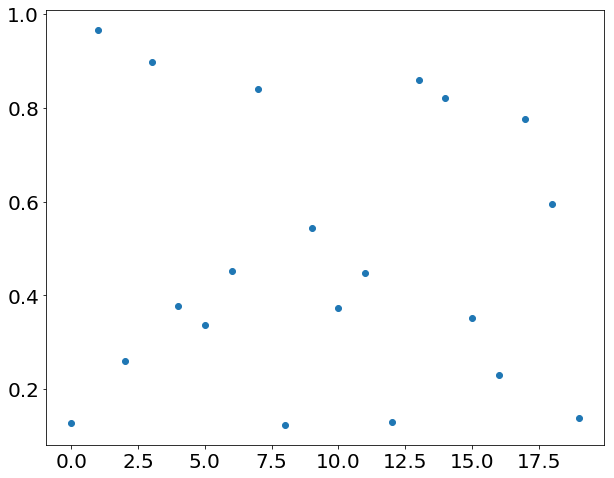

In [3]:
plt.plot(samples, 'o')

In [4]:
np.sum(np.abs(samples - np.average(samples)))

4.8838120343370734

In [5]:
np.sum((samples - np.average(samples))**2)

1.5704816214856656

In [9]:
# in one function:
def misfit_no_grad(mean):
    """Plot misfit to defined line value and calculate norms"""
    plt.figure(figsize=(10,8))
    plt.stem(samples, bottom=mean)
    plt.ylabel("value")
    plt.xlabel("sample")
    residuals = samples - mean
    plt.ylim([-0.5,1.55])
    plt.text(0,1.4,"$\sum R$ = %2.3f" % np.sum(residuals))
    plt.text(6,1.4,"$\sum|R|$ = %2.3f" % np.sum(np.abs(residuals)))
    plt.text(12,1.4,"$\sum R^2$ = %2.3f" % np.sum(residuals**2))
    plt.show()

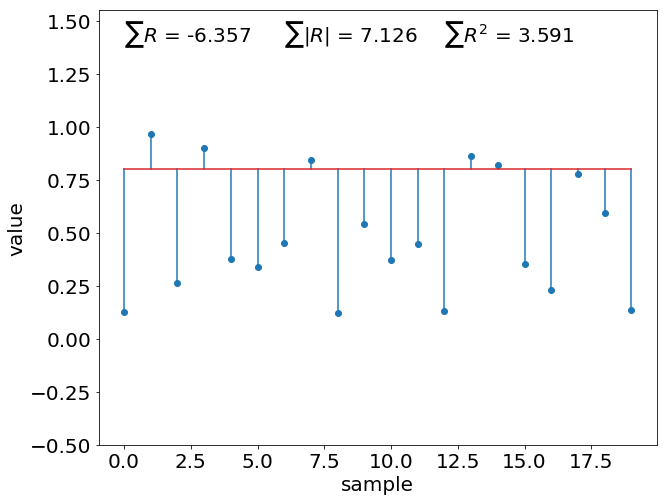

In [10]:
misfit_no_grad(np.average(0.8))

In [12]:
widgets.interact(misfit_no_grad, mean=(-0.5,1.2,0.05))

<function __main__.misfit_no_grad>

Visualisation of the different norms:

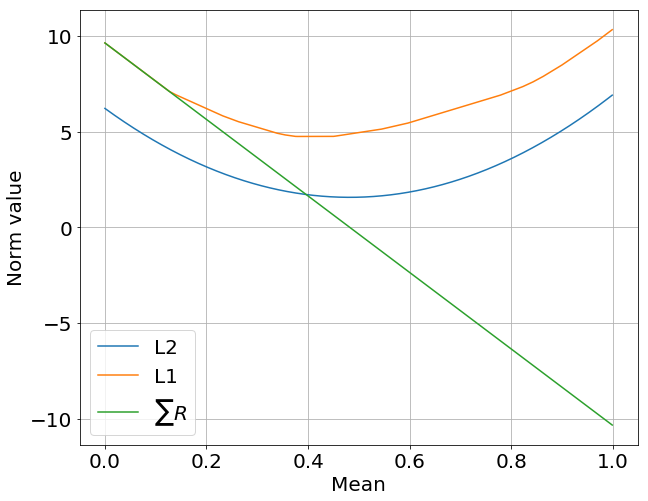

In [74]:
l1 = []
l2 = []
sum_res = []
m_range = np.arange(0,1.,0.001)
for m in m_range:
    residuals = samples - m
    l1.append(np.sum(np.abs(residuals)))
    l2.append(np.sum(residuals**2))
    sum_res.append(np.sum(residuals))


plt.plot(m_range, l2, label="L2")
plt.plot(m_range, l1, label="L1")
plt.plot(m_range, sum_res, label="$\sum R$")
plt.legend(loc='lower left')
plt.xlabel("Mean")
plt.ylabel("Norm value")
plt.grid()

## Linear Regression for a line

As a next step, we fit a line to random points in space. We now have to optimize both intercept and gradient of the line:

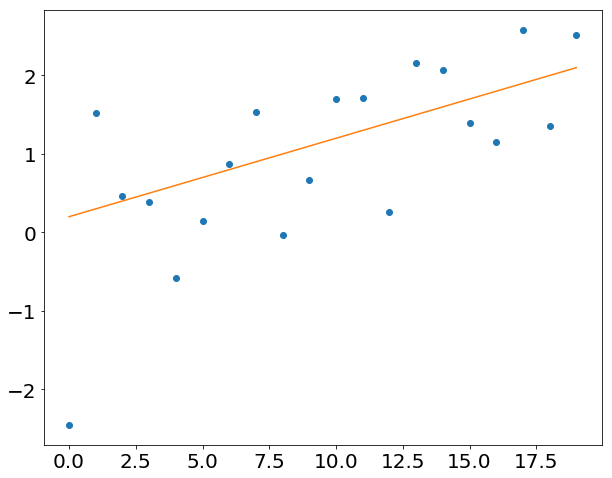

In [49]:
intercept = 0.2
gradient = 0.1
n_samples = 20
samples_line = intercept +  np.arange(n_samples) * gradient + np.random.normal(size=n_samples)
plt.plot(samples_line, 'o')
plt.plot(np.arange(n_samples) * gradient + intercept)

In [57]:
# in one function:
def misfit_line(intercept, grad):
    """Plot misfit to defined line value and calculate norms"""
    plt.figure(figsize=(10,8))
    # plt.stem(samples_line, bottom=(intercept + np.arange(n_samples) * grad))
    plt.plot(samples_line, 'o')
    plt.plot(np.arange(n_samples) * grad + intercept)
    plt.ylabel("value")
    plt.xlabel("sample")
    residuals = samples_line - (intercept + np.arange(n_samples) * grad)
    plt.ylim([-1.5,3.05])
    y_pos_labels = 2.6
    plt.text(0,y_pos_labels,"$\sum R$ = %2.3f" % np.sum(residuals))
    plt.text(6,y_pos_labels,"$\sum|R|$ = %2.3f" % np.sum(np.abs(residuals)))
    plt.text(12,y_pos_labels,"$\sum R^2$ = %2.3f" % np.sum(residuals**2))
    plt.show()

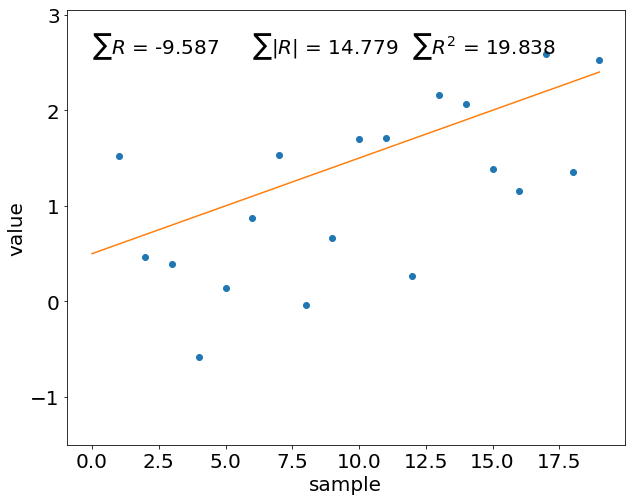

In [58]:
misfit_line(0.5,0.1)

In [59]:
widgets.interact(misfit_line, intercept=(-0.5,1.2,0.05), grad=(-0.1,0.3,0.01))

<function __main__.misfit_line>

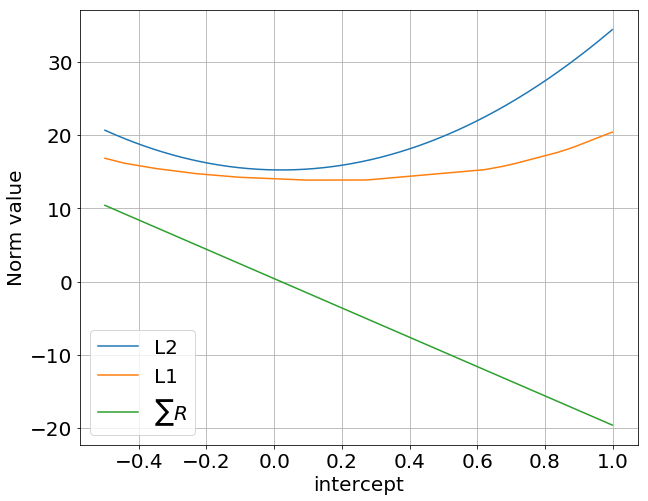

In [72]:
l1 = []
l2 = []
sum_res = []
intercept_range = np.arange(-0.5,1.,0.001)
for i in intercept_range:
    residuals = samples_line - (i + np.arange(n_samples) * gradient)
    l1.append(np.sum(np.abs(residuals)))
    l2.append(np.sum(residuals**2))
    sum_res.append(np.sum(residuals))


plt.plot(intercept_range, l2, label="L2")
plt.plot(intercept_range, l1, label="L1")
plt.plot(intercept_range, sum_res, label="$\sum R$")
plt.legend(loc='lower left')
plt.xlabel("intercept")
plt.ylabel("Norm value")
plt.grid()

In [13]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')